In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

#from numpy import mean
#from sklearn.datasets import make_classification
#from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import RandomOverSampler

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100, verbose = 10)
#cb.fit(X, y, cat_features = cat_features, verbose = False)

In [3]:
data = pd.read_csv('../../Data/20%_Loans_12_feat_scaled.csv')

In [4]:
data.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,pub_rec,term,grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,loan_status_bin
0,-0.813096,-0.398686,-0.934226,0.562180,0.284043,0.654268,-0.379653,0.731341,0.845577,-0.664012,-0.379497,1.303870,-1.007532,-0.017317,1.086550,-0.007383,-0.007383,-0.357405,-0.864539,1.0
1,0.638440,0.261028,0.470223,0.029274,-0.010299,-1.040687,-0.379653,0.731341,0.845577,-0.409357,2.635065,-0.766948,-1.007532,-0.017317,1.086550,-0.007383,-0.007383,-0.357405,-0.864539,0.0
2,-0.241914,-0.148068,-0.394106,-0.513897,0.900017,3.559904,-0.379653,0.731341,0.845577,1.118570,2.635065,-0.766948,-1.007532,-0.017317,-0.920345,-0.007383,-0.007383,2.797949,-0.864539,1.0
3,0.517915,-1.117370,0.188206,0.662975,-0.036939,-1.040687,-0.379653,0.731341,-0.408699,-0.918667,2.635065,-0.766948,-1.007532,-0.017317,-0.920345,-0.007383,-0.007383,2.797949,-0.864539,0.0
4,1.765084,-1.117370,1.276645,0.844032,0.954597,0.896404,-0.379653,0.731341,-0.408699,0.609261,-0.379497,1.303870,-1.007532,-0.017317,1.086550,-0.007383,-0.007383,-0.357405,-0.864539,1.0


In [5]:
data.shape

(110074, 20)

In [6]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(110074, 19)

In [7]:
y = data['loan_status_bin']

In [8]:
steps = [('model', cb)]
pipeline = Pipeline(steps=steps)

In [9]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

print(scores)
score = np.mean(scores)
print(score)

[0.62034976 0.61871451 0.61362707 0.61539859 0.6155174 ]
0.6167214673395233


In [10]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[14091, 30658],
       [11531, 53794]])

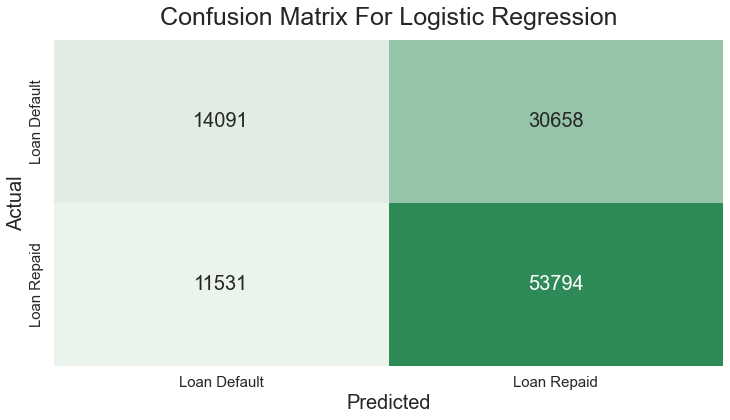

In [11]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [12]:
accuracy_score(y, y_pred)

0.6167214782782492

In [13]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

53794
30658
11531
14091
0.6167214782782492


In [14]:
cb.fit(X,y)

Learning rate set to 0.5
0:	learn: 0.6680100	total: 66.6ms	remaining: 6.59s
10:	learn: 0.6489126	total: 115ms	remaining: 927ms
20:	learn: 0.6450244	total: 161ms	remaining: 604ms
30:	learn: 0.6422768	total: 209ms	remaining: 465ms
40:	learn: 0.6395484	total: 257ms	remaining: 370ms
50:	learn: 0.6375099	total: 304ms	remaining: 292ms
60:	learn: 0.6355646	total: 351ms	remaining: 224ms
70:	learn: 0.6336518	total: 397ms	remaining: 162ms
80:	learn: 0.6321175	total: 447ms	remaining: 105ms
90:	learn: 0.6305192	total: 494ms	remaining: 48.9ms
99:	learn: 0.6291935	total: 535ms	remaining: 0us


In [15]:
X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'fico_range_low', 'pub_rec', 'term', 'grade', 'emp_length',
       'Not Verified', 'Source Verified', 'Verified', 'ANY', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

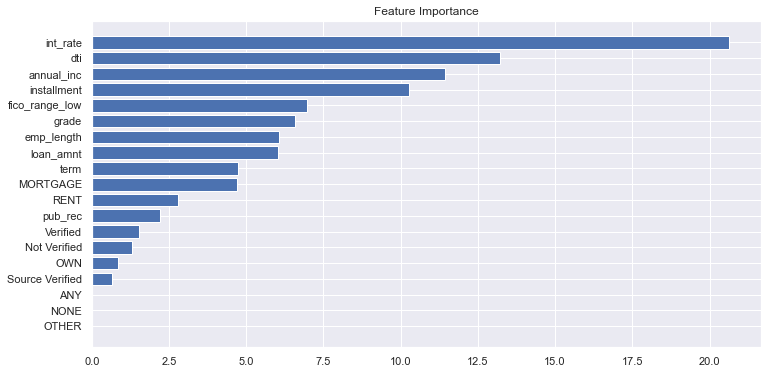

In [16]:
import matplotlib.pyplot as plt

feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

In [17]:
import shap

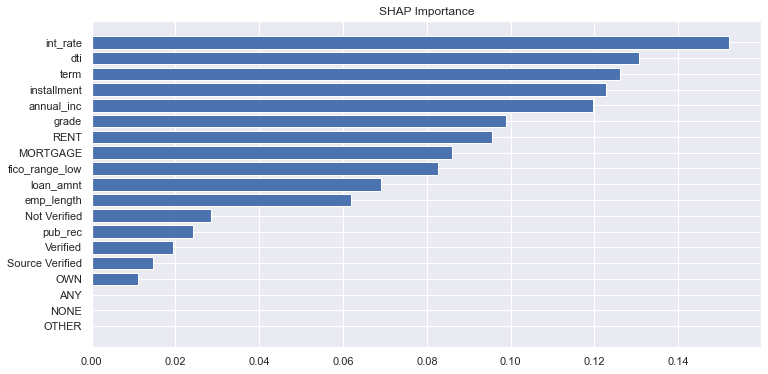

In [18]:
explainer = shap.Explainer(cb)
shap_values = explainer(X)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('SHAP Importance');

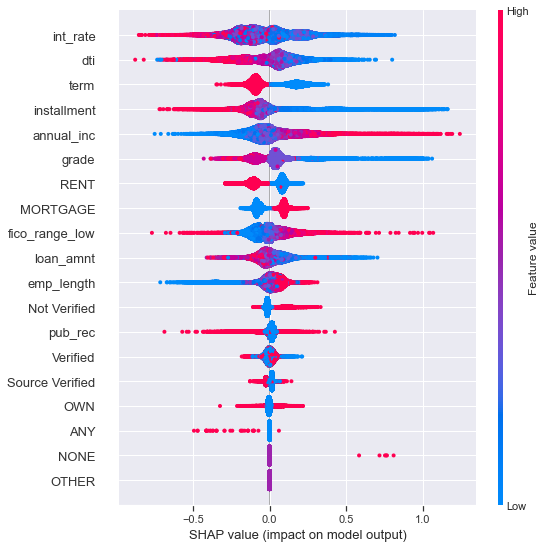

In [19]:
shap.summary_plot(shap_values, max_display=X.shape[0])